# Classification 2 - Boosted Trees

https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

<b> Goal:</b> Predict Breast Cancer ('diagnosis')

    id: ID number
    diagnosis: The diagnosis of breast tissues (M = malignant, B = benign)
    radius_mean: mean of distances from center to points on the perimeter
    texture_mean: standard deviation of gray-scale values
    perimeter_mean: mean size of the core tumor
    area_mean: no information
    smoothness_mean: mean of local variation in radius lengths
    compactness_mean: mean of perimeter^2 / area - 1.0
    concavity_mean: mean of severity of concave portions of the contour
    concave points_mean: mean for number of concave portions of the contour
    symmetry_mean: no information
    fractal_dimension_mean: mean for "coastline approximation" - 1
    radius_se: standard error for the mean of distances from center to points on the perimeter
    texture_se: standard error for standard deviation of gray-scale values
    perimeter_se: no information
    area_se: no information
    smoothness_se: standard error for local variation in radius lengths
    compactness_se: standard error for perimeter^2 / area - 1.0
    concavity_se: standard error for severity of concave portions of the contour
    concave points_se: standard error for number of concave portions of the contour
    symmetry_se: no information
    fractal_dimension_se: standard error for "coastline approximation" - 1
    radius_worst: "worst" or largest mean value for mean of distances from center to points on the perimeter
    texture_worst: "worst" or largest mean value for standard deviation of gray-scale values
    perimeter_worst: no information
    area_worst: no information
    smoothness_worst: "worst" or largest mean value for local variation in radius lengths
    compactness_worst: "worst" or largest mean value for perimeter^2 / area - 1.0
    concavity_worst: "worst" or largest mean value for severity of concave portions of the contour
    concave points_worst: "worst" or largest mean value for number of concave portions of the contour
    symmetry_worst: no information
    fractal_dimension_worst: "worst" or largest mean value for "coastline approximation" - 1

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm as cm
import random
import sys
import time
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

plt.rcParams["figure.figsize"] = (8, 8) #Change matplotlib Box Size
plt.rcParams["font.size"] = 14 #Change matplotlib Font Size

## Part 1 - Running Models

In [2]:
data = pd.read_csv('data-breast-cancer.csv', delimiter=',')

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


    1) ID cannot be used for classification - Drop
    2) Diagnosis is our y label
    3) Unnamed: 32 is NaN - Drop

In [4]:
#Drop unused columns and move y to separate variable
y = data['diagnosis'] # move y
X = data.drop(['id', 'diagnosis','Unnamed: 32'],1)# drop id and diagnosis
data = data.drop(['id','Unnamed: 32'],1)# drop id and diagnosis
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Intial Test with Random Forest and Feature Importance

In [5]:
#Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

abc = AdaBoostClassifier()

abc.fit(X_train, y_train)

predictions = abc.predict(X_test)

#plot_importance(clf)

print(classification_report(y_test,predictions))
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(abc.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

Training set has 398 samples.
Testing set has 171 samples.
              precision    recall  f1-score   support

           B       0.98      0.96      0.97       108
           M       0.94      0.97      0.95        63

   micro avg       0.96      0.96      0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171

Accuracy: 96.49%


,importance
feature,
area_se,0.10
compactness_se,0.08
texture_worst,0.08
concave points_mean,0.08
fractal_dimension_se,0.08
concavity_worst,0.06
area_worst,0.06
perimeter_worst,0.06
texture_mean,0.06


## Part 2 - Feature Selection

Number of Benign:  357
Number of Malignant :  212


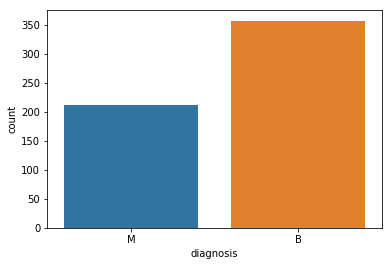

In [6]:
# Frequency of cancer stages
sns.countplot(data['diagnosis'],label="Count")
B, M = y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)
None

In [7]:
X.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


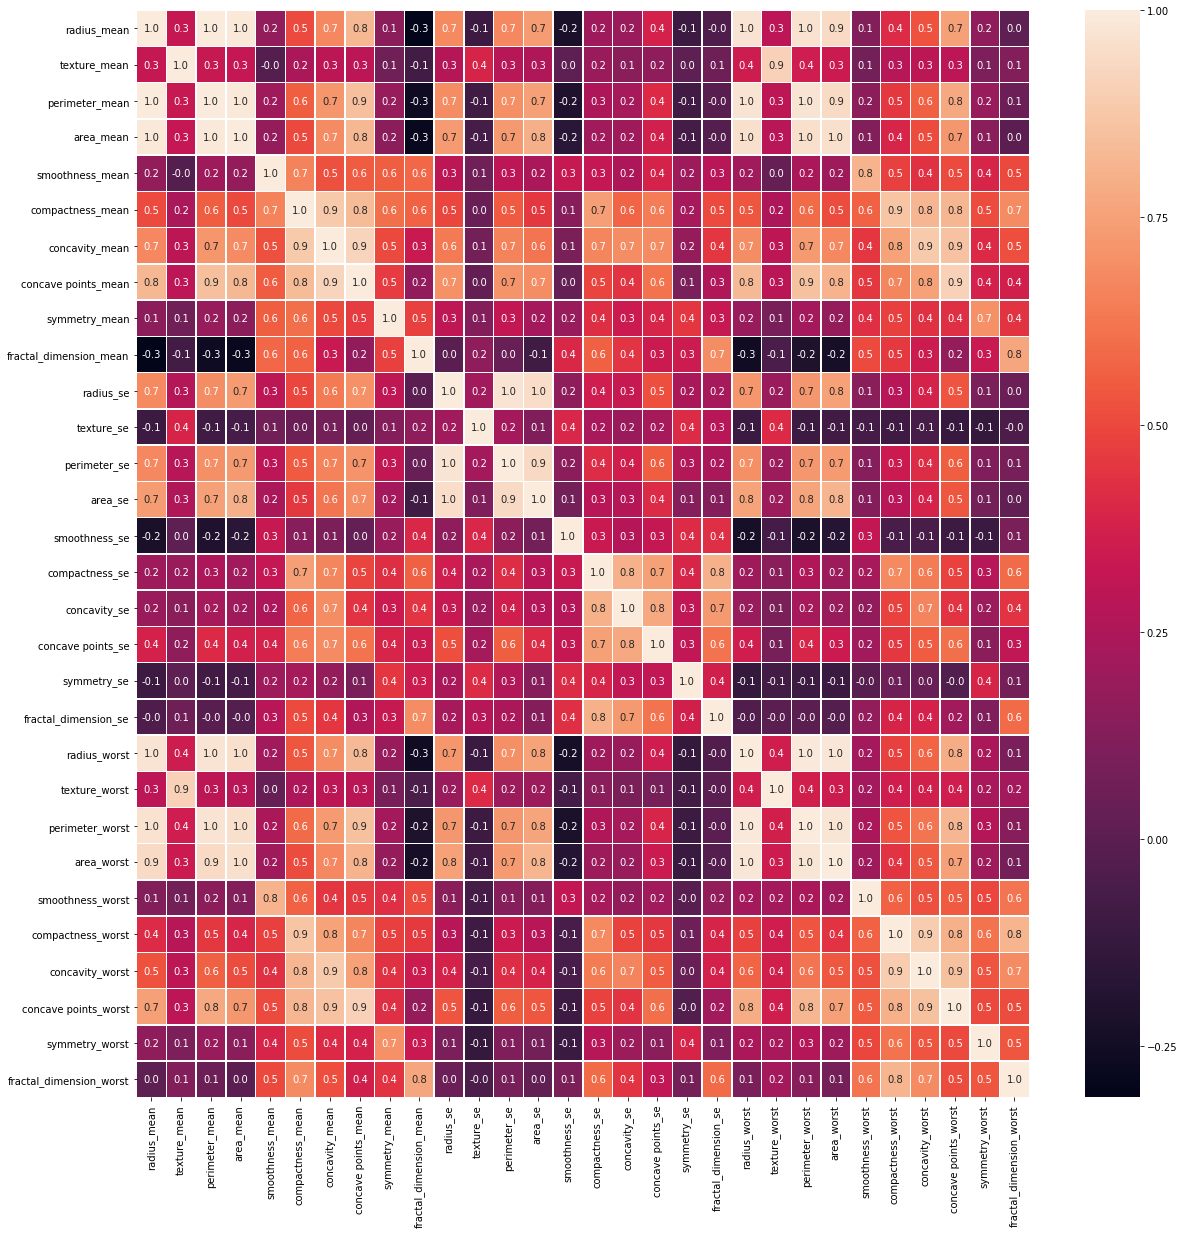

In [8]:
#correlation map
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
None

In [9]:
df_corr = X.corr()

In [10]:
df_corr

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [11]:
k = 0
df_high_corr = {}
for i in range(len(X.columns)):
    if (df_corr.loc[np.array(df_corr >= 0.95)[i]] >= 0.95).any(axis=0).sum() > 1:
        df_high_corr[k] = df_corr.loc[(df_corr.loc[np.array(df_corr >= 0.95)[i]] >= 0.95).any(axis=0),(df_corr.loc[np.array(df_corr >= 0.95)[i]] >= 0.95).any(axis=0)]
        k += 1

In [12]:
df_high_corr[0]

,radius_mean,perimeter_mean,area_mean,radius_worst,perimeter_worst,area_worst
radius_mean,1.000000,0.997855,0.987357,0.969539,0.965137,0.941082
perimeter_mean,0.997855,1.000000,0.986507,0.969476,0.970387,0.941550
area_mean,0.987357,0.986507,1.000000,0.962746,0.959120,0.959213
radius_worst,0.969539,0.969476,0.962746,1.000000,0.993708,0.984015
perimeter_worst,0.965137,0.970387,0.959120,0.993708,1.000000,0.977578
area_worst,0.941082,0.941550,0.959213,0.984015,0.977578,1.000000


In [13]:
df_high_corr[3]

,radius_se,perimeter_se,area_se
radius_se,1.000000,0.972794,0.951830
perimeter_se,0.972794,1.000000,0.937655
area_se,0.951830,0.937655,1.000000


In [14]:
drop_list1 = ['radius_mean','area_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','radius_mean']
X_1 = X.drop(drop_list1,axis = 1 )
X_1.head()

,texture_mean,perimeter_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,...,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,10.38,122.80,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,0.9053,153.40,...,0.03003,0.006193,17.33,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,17.77,132.90,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.7339,74.08,...,0.01389,0.003532,23.41,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,21.25,130.00,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7869,94.03,...,0.02250,0.004571,25.53,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,20.38,77.58,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,1.1560,27.23,...,0.05963,0.009208,26.50,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,14.34,135.10,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7813,94.44,...,0.01756,0.005115,16.67,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


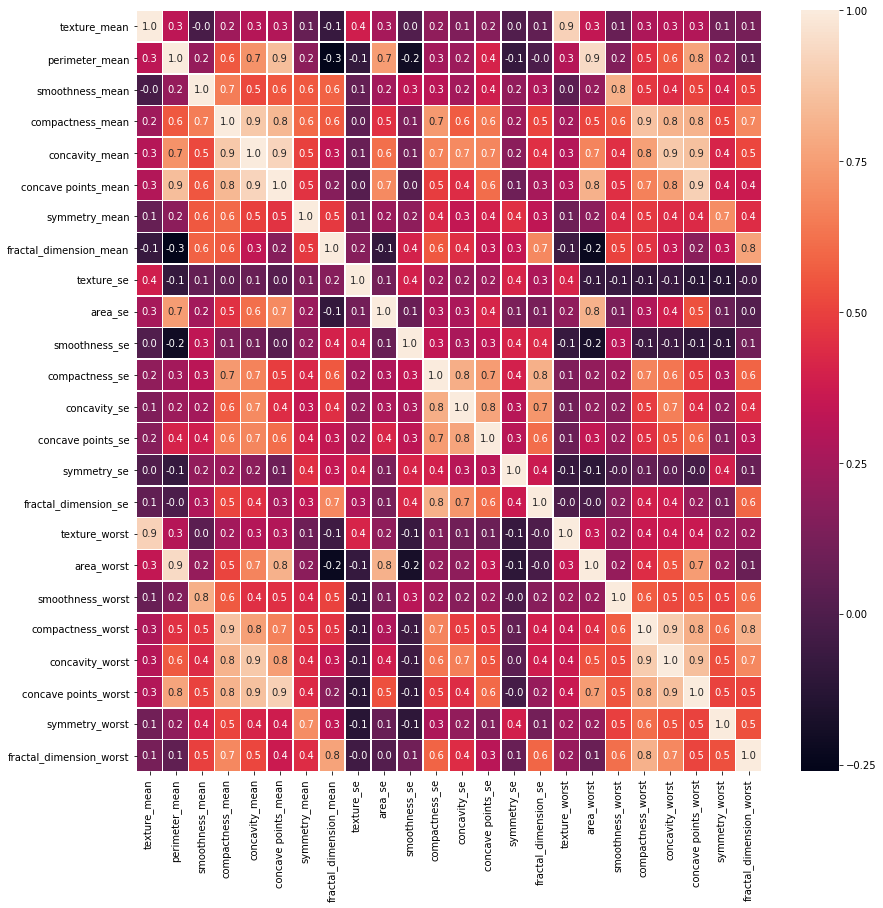

In [15]:
#Correlation map after selection
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(X_1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [16]:
#Splitting into train and test sets after reducing features
X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size=0.3 , random_state=0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 398 samples.
Testing set has 171 samples.


In [17]:
#refit the model
abc = AdaBoostClassifier()

abc.fit(X_train, y_train)

predictions = abc.predict(X_test)

print(classification_report(y_test,predictions))
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(abc.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

              precision    recall  f1-score   support

           B       0.97      0.98      0.98       108
           M       0.97      0.95      0.96        63

   micro avg       0.97      0.97      0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

Accuracy: 97.08%


,importance
feature,
area_worst,0.14
area_se,0.12
texture_mean,0.10
texture_worst,0.10
fractal_dimension_se,0.06
smoothness_mean,0.06
concave points_mean,0.06
texture_se,0.06
compactness_se,0.06


# Removing highly correlated features might or might not improve your score. But it helps with interpretability.

In [18]:
#drop features with lowest importance
drop_list2 = ['concavity_se','symmetry_mean', 'fractal_dimension_mean','compactness_worst'
              ,'smoothness_se','perimeter_mean','concave points_se']
X_2 = X_1.drop(drop_list2,axis = 1 )
X_2.head()

,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,texture_se,area_se,compactness_se,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,10.38,0.11840,0.27760,0.3001,0.14710,0.9053,153.40,0.04904,0.03003,0.006193,17.33,2019.0,0.1622,0.7119,0.2654,0.4601,0.11890
1,17.77,0.08474,0.07864,0.0869,0.07017,0.7339,74.08,0.01308,0.01389,0.003532,23.41,1956.0,0.1238,0.2416,0.1860,0.2750,0.08902
2,21.25,0.10960,0.15990,0.1974,0.12790,0.7869,94.03,0.04006,0.02250,0.004571,25.53,1709.0,0.1444,0.4504,0.2430,0.3613,0.08758
3,20.38,0.14250,0.28390,0.2414,0.10520,1.1560,27.23,0.07458,0.05963,0.009208,26.50,567.7,0.2098,0.6869,0.2575,0.6638,0.17300
4,14.34,0.10030,0.13280,0.1980,0.10430,0.7813,94.44,0.02461,0.01756,0.005115,16.67,1575.0,0.1374,0.4000,0.1625,0.2364,0.07678


In [19]:
#Splitting into train and test sets after reducing features
X_train, X_test, y_train, y_test = train_test_split(X_2, y, test_size=0.3 , random_state=0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 398 samples.
Testing set has 171 samples.


In [20]:
#refit the model
abc = AdaBoostClassifier()

abc.fit(X_train, y_train)

predictions = abc.predict(X_test)

print(classification_report(y_test,predictions))
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(abc.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

              precision    recall  f1-score   support

           B       0.97      0.98      0.98       108
           M       0.97      0.95      0.96        63

   micro avg       0.97      0.97      0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

Accuracy: 97.08%


,importance
feature,
area_worst,0.14
area_se,0.12
texture_mean,0.10
texture_worst,0.10
concave points_mean,0.06
texture_se,0.06
compactness_se,0.06
smoothness_mean,0.06
fractal_dimension_se,0.06


# Like with random forests AdaBoost does not get better or not much better when you remove the features of least importance, but you can still use it to reduce the number of features if you have too many to understand

# Part 3 -  Hyperparameter Tuning

## 1. Random Search

### AdaBoost

In [21]:
pipeline = Pipeline([('scl', StandardScaler()),('adaboost', AdaBoostClassifier(random_state=5))])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))


parameters = {'adaboost__n_estimators': [30, 40, 50, 60, 70, 80, 90],
              'adaboost__learning_rate': [0.1, 0.2, 0.5, 1, 2]}

#we use stratified kfold here: The folds are made by preserving the percentage of samples for each class.
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

clf_gs = RandomizedSearchCV(pipeline, parameters,cv=cv, random_state=4)
clf_gs.fit(X_train, y_train)

#print(clf_gs.cv_results_)

print("Best score: %s" % (clf_gs.best_score_))
print("Best parameter set: %s" % (clf_gs.best_params_))
predictions = clf_gs.predict(X_test)

Training set has 398 samples.
Testing set has 171 samples.
Best score: 0.959798994975
Best parameter set: {'adaboost__n_estimators': 40, 'adaboost__learning_rate': 0.5}


//anaconda/envs/py36/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [22]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(y_test,predictions))

importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(clf_gs.best_estimator_.named_steps["adaboost"].feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

Accuracy: 98.25%
              precision    recall  f1-score   support

           B       0.98      0.99      0.99       108
           M       0.98      0.97      0.98        63

   micro avg       0.98      0.98      0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



,importance
feature,
compactness_se,0.100
texture_worst,0.100
perimeter_worst,0.100
concave points_worst,0.100
texture_mean,0.100
area_se,0.100
area_worst,0.075
smoothness_mean,0.050
compactness_mean,0.050


## Hyper-parameter tuning on the original data with all features (including highly correlated ones) increases the score.

## Be careful, this could lead to overfitting, try a different random seed for the random search and see what happens:

In [23]:
pipeline = Pipeline([('scl', StandardScaler()),('adaboost', AdaBoostClassifier(random_state=5))])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))


parameters = {'adaboost__n_estimators': [30, 40, 50, 60, 70, 80, 90],
              'adaboost__learning_rate': [0.1, 0.2, 0.5, 1, 2]}

#we use stratified kfold here: The folds are made by preserving the percentage of samples for each class.
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

clf_gs = RandomizedSearchCV(pipeline, parameters,cv=cv, random_state=1)
clf_gs.fit(X_train, y_train)

#print(clf_gs.cv_results_)

print("Best score: %s" % (clf_gs.best_score_))
print("Best parameter set: %s" % (clf_gs.best_params_))
predictions = clf_gs.predict(X_test)

Training set has 398 samples.
Testing set has 171 samples.


//anaconda/envs/py36/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best score: 0.962311557789
Best parameter set: {'adaboost__n_estimators': 90, 'adaboost__learning_rate': 1}


In [24]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(y_test,predictions))

importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(clf_gs.best_estimator_.named_steps["adaboost"].feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

Accuracy: 97.66%
              precision    recall  f1-score   support

           B       0.98      0.98      0.98       108
           M       0.97      0.97      0.97        63

   micro avg       0.98      0.98      0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



,importance
feature,
compactness_se,0.078
texture_worst,0.078
area_se,0.067
fractal_dimension_se,0.067
concavity_worst,0.056
perimeter_worst,0.056
concave points_mean,0.056
texture_mean,0.056
concave points_worst,0.044


In [25]:
# Trying a different base learner that might overfit
from sklearn.tree import DecisionTreeClassifier
pipeline = Pipeline([('scl', StandardScaler())
                     ,('adaboost', AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=5)
                                                      ,random_state=5))])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))


parameters = {'adaboost__n_estimators': [30, 40, 50, 60, 70, 80, 90],
              'adaboost__learning_rate': [0.1, 0.2, 0.5, 1, 2]}

#we use stratified kfold here: The folds are made by preserving the percentage of samples for each class.
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

clf_gs = RandomizedSearchCV(pipeline, parameters,cv=cv, random_state=4)
clf_gs.fit(X_train, y_train)

#print(clf_gs.cv_results_)

print("Best score: %s" % (clf_gs.best_score_))
print("Best parameter set: %s" % (clf_gs.best_params_))
predictions = clf_gs.predict(X_test)

Training set has 398 samples.
Testing set has 171 samples.
Best score: 0.957286432161
Best parameter set: {'adaboost__n_estimators': 40, 'adaboost__learning_rate': 1}


In [26]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(y_test,predictions))

importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(clf_gs.best_estimator_.named_steps["adaboost"].feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

Accuracy: 95.91%
              precision    recall  f1-score   support

           B       0.95      0.98      0.97       108
           M       0.97      0.92      0.94        63

   micro avg       0.96      0.96      0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



,importance
feature,
area_se,0.108
radius_se,0.093
texture_mean,0.075
texture_worst,0.058
symmetry_worst,0.053
compactness_mean,0.053
perimeter_se,0.050
fractal_dimension_mean,0.050
concave points_worst,0.048


## Default base learner in AdaBoost sklearn is a decision tree with depth 1, if you increase, you might overfit

# Gradient Boosting from scikit learn

In [27]:
#Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

gbc = GradientBoostingClassifier()

gbc.fit(X_train, y_train)

predictions = gbc.predict(X_test)

#plot_importance(clf)

print(classification_report(y_test,predictions))
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(gbc.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

Training set has 398 samples.
Testing set has 171 samples.
              precision    recall  f1-score   support

           B       0.98      0.99      0.99       108
           M       0.98      0.97      0.98        63

   micro avg       0.98      0.98      0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

Accuracy: 98.25%


,importance
feature,
concave points_worst,0.444
concave points_mean,0.275
perimeter_worst,0.071
area_se,0.048
area_worst,0.040
radius_worst,0.026
texture_worst,0.025
concavity_worst,0.014
symmetry_mean,0.010


# Gradient Boosting gives good performance out of the box

In [29]:
pipeline = Pipeline([('scl', StandardScaler()),('gradient_boosting', GradientBoostingClassifier(random_state=5))])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))


parameters = {'gradient_boosting__n_estimators': [30, 40, 50, 60, 70, 80, 90],
              'gradient_boosting__learning_rate': [0.1, 0.2, 0.5, 1, 2],
              'gradient_boosting__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

#we use stratified kfold here: The folds are made by preserving the percentage of samples for each class.
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

clf_gs = RandomizedSearchCV(pipeline, parameters,cv=cv, random_state=1)
clf_gs.fit(X_train, y_train)

#print(clf_gs.cv_results_)

print("Best score: %s" % (clf_gs.best_score_))
print("Best parameter set: %s" % (clf_gs.best_params_))
predictions = clf_gs.predict(X_test)

Training set has 398 samples.
Testing set has 171 samples.
Best score: 0.939698492462
Best parameter set: {'gradient_boosting__n_estimators': 90, 'gradient_boosting__max_depth': 3, 'gradient_boosting__learning_rate': 0.2}


In [30]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(y_test,predictions))

importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(clf_gs.best_estimator_.named_steps["gradient_boosting"].feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

Accuracy: 98.25%
              precision    recall  f1-score   support

           B       0.98      0.99      0.99       108
           M       0.98      0.97      0.98        63

   micro avg       0.98      0.98      0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



,importance
feature,
concave points_worst,0.391
concave points_mean,0.324
perimeter_worst,0.069
area_worst,0.060
area_se,0.049
texture_worst,0.026
symmetry_worst,0.016
concavity_worst,0.013
symmetry_mean,0.008


# More hyper-parameters to tune in GradientBoosting so performance gets better, but be careful with overfitting!

In [31]:
y_score_train = clf_gs.predict_proba(X_train)
y_score_test = clf_gs.predict_proba(X_test)

In [32]:
le = preprocessing.LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.transform(y_test)

In [33]:
from sklearn.metrics import roc_curve, auc
fpr_test, tpr_test, _ = roc_curve(y_test_le, y_score_test[:, 1])
roc_auc_test = auc(fpr_test, tpr_test)
fpr_train, tpr_train, _ = roc_curve(y_train_le, y_score_train[:, 1])
roc_auc_train = auc(fpr_train, tpr_train)

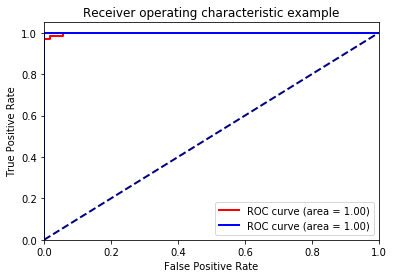

In [34]:
plt.figure()
lw =2
plt.plot(fpr_test, tpr_test, color='red',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot(fpr_train, tpr_train, color='blue',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_train)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Tuned Gradient Boosting looks like it is overfitting to training data, lets take the Gradient Boosting out of the box:

In [35]:
y_score_train = gbc.predict_proba(X_train)
y_score_test = gbc.predict_proba(X_test)

In [36]:
fpr_test, tpr_test, _ = roc_curve(y_test_le, y_score_test[:, 1])
roc_auc_test = auc(fpr_test, tpr_test)
fpr_train, tpr_train, _ = roc_curve(y_train_le, y_score_train[:, 1])
roc_auc_train = auc(fpr_train, tpr_train)

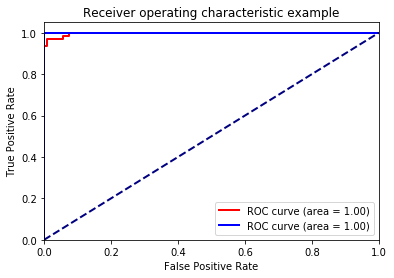

In [37]:
plt.figure()
lw =2
plt.plot(fpr_test, tpr_test, color='red',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot(fpr_train, tpr_train, color='blue',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_train)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## You can see with the ROC curve that these models easily overfit, they look 'too good to be true' on the learning data

# Compare with Random Forest as tuned in earlier exercise

In [38]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=5,n_estimators=50)
rfc.fit(X_train, y_train)
y_score_train = rfc.predict_proba(X_train)
y_score_test = rfc.predict_proba(X_test)

In [39]:
fpr_test, tpr_test, _ = roc_curve(y_test_le, y_score_test[:, 1])
roc_auc_test = auc(fpr_test, tpr_test)
fpr_train, tpr_train, _ = roc_curve(y_train_le, y_score_train[:, 1])
roc_auc_train = auc(fpr_train, tpr_train)

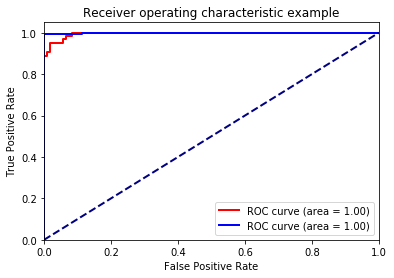

In [40]:
plt.figure()
lw =2
plt.plot(fpr_test, tpr_test, color='red',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot(fpr_train, tpr_train, color='blue',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_train)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [41]:
#untuned Random Forest
rfc = RandomForestClassifier(max_depth=1)
rfc.fit(X_train, y_train)
y_score_train = rfc.predict_proba(X_train)
y_score_test = rfc.predict_proba(X_test)

//anaconda/envs/py36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [42]:
fpr_test, tpr_test, _ = roc_curve(y_test_le, y_score_test[:, 1])
roc_auc_test = auc(fpr_test, tpr_test)
fpr_train, tpr_train, _ = roc_curve(y_train_le, y_score_train[:, 1])
roc_auc_train = auc(fpr_train, tpr_train)

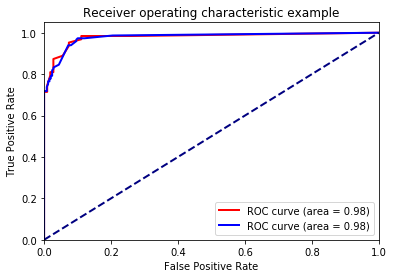

In [43]:
plt.figure()
lw =2
plt.plot(fpr_test, tpr_test, color='red',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot(fpr_train, tpr_train, color='blue',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_train)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## A very shallow Random Forest is less prone to overfitting, but accuracy looks not so great:

In [44]:
predictions = rfc.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(y_test,predictions))

Accuracy: 92.98%
              precision    recall  f1-score   support

           B       0.92      0.97      0.95       108
           M       0.95      0.86      0.90        63

   micro avg       0.93      0.93      0.93       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.93      0.93       171



# Still might perform better on data it has never seen!